In [128]:
# preamble. 
import numpy as np # basic vector/matrix math
import matplotlib.pyplot as plt # plotting and illustrations 
import seaborn as sns # advanced plotting and illustrations. 
import pandas as pd # data loading, saving, and general data manipulation. 
import scipy.stats as stats # inter alia, statistical distributions, functions and relevant objects.
import scipy.optimize as optimize 
import torch # ML/AI model's and general optimization 


# regression model imports.  
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import random
import torch
import math as m 
import torch.nn as nn 

# STA 2453 Lab 2 Submission

This lab notebook must be completed in the appropriate time during class and invigilated by the instructor. There are  3 parts in this evaluation, you must add both this notebook, and another generated `.py` file to the PR. 

Once the PR is in place, please tag both me and the TA in it. So in the end you will have two files. 

- `STA2453-Lab-2.ipynb`
- `STA2453-Lab-2.py`

Both of these are needed for a good submission. 







---

## Case Study: Modelling Student Survey Results from the University of Catania, Italy.
---

This data is collected from a survey of 270 students attending a statistics course at the Department of Economics and Business of the University of Catania in the academic year 2011/2012.  It
     contains the following variables:

- `GENDER` gender of the respondent

- `HEIGHT` height of the respondent, measured in centimeters

- `WEIGHT` weight of the respondent measure in kilograms. 

- `HEIGHT.F` height of the respondent's father measured in centimeters. 

---


The dataset can be found here: 

`https://utstat.utoronto.ca/~pocucan/italian_students.csv`



---

## Part 1 Linear Regression 
---

This part of the evaluation considers a linear regression model with an extension into a weighted counterpart.  

We wish to assess the viability of this statement:

`Can the height of the father predict the height of the child?` 

Load the dataset into a dataframe called `df`, grab the relevant columns as stated above. 

Next create two dataframes named `df_m` and `df_f` for male/female respectively. 




In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
# load the dataset and segment by reported gender. 
# load data
df = pd.read_csv("/content/drive/MyDrive/STA2453/italian_students.csv")

In [131]:
# just grab the relevant columns 
df = df[["GENDER", "HEIGHT", "HEIGHT.F"]]
df

,GENDER,HEIGHT,HEIGHT.F
0,M,184,185
1,M,186,180
2,M,186,182
3,M,179,177
4,M,175,175
...,...,...,...
265,F,160,178
266,F,160,172
267,F,165,174
268,F,165,184


In [132]:
# check missing values
df.isna().sum()

GENDER      0
HEIGHT      0
HEIGHT.F    0
dtype: int64

In [133]:
# segment by gender. 
df_M = df[ df["GENDER"] =="M" ]
df_F = df[ df["GENDER"] =="F" ]

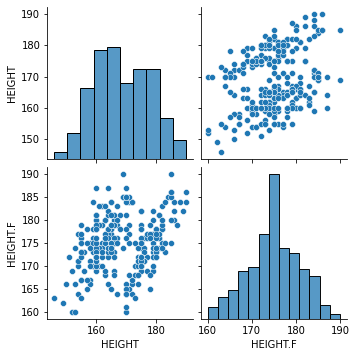

In [134]:
# plot the data in a pairplot using the seaborn package and title it appropriately. 
sns.pairplot(df)
# give some comments on the structure of the data. 

## Comment: 
The above plot appears to have two different patterns, which might because of the different groups of males and females. The height of a child and the height of his or her father tend to show a positive linear relationship.

Plot the same data in a pairplot using the seaborn package. Title it approprietly, AND, 
color the points by the GENDER variable. 
- Females in red 
- Males in blue

Give some comments on the structure of the data. Specifically whether the assumptions for a linear model fit are valid or not. 

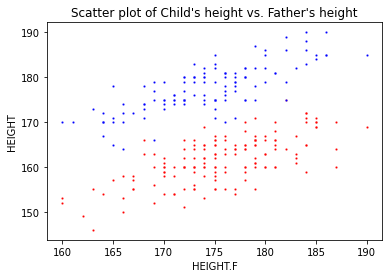

In [135]:
# plot the data with respective colours. 
# Females in red.
sns.scatterplot(x = df_F["HEIGHT.F"], y=df_F["HEIGHT"], color = 'red', s = 5.0).set(title="Scatter plot of Child's height vs. Father's height")
# Males in blue.
sns.scatterplot(x = df_M["HEIGHT.F"], y=df_M["HEIGHT"], color = 'blue', s = 5.0)
# now give some comments on the structure of the data

## Comment: 
The height of a female and the height of her father tend to show a positive linear relationship.

Similarly, the height of a male and the height of his father tend to show a positive linear relationship.

Moreover, it is obvious that males mostly tend to be taller than females. 

Fit a linear model using the following setup: 
`HEIGHT ~ HEIGHT.F`, ie. can the father's height predict the child's hight. Denote this linear model as 
`lm_general`, i.e. a linear model for the general dataset. 

Calculate the MSE of `lm_general`. 

In [136]:
# declare model. 
lm_general = LinearRegression()
# numpy matrices.
X_general = df[['HEIGHT.F']]
y_general = df['HEIGHT'] 
# fit model. 
lm_general.fit(X_general, y_general)

# Prediction.
predicted_y_general = lm_general.predict(X_general)

# MSE.
from sklearn.metrics import mean_squared_error
mse_general = mean_squared_error(y_general, predicted_y_general)
print(f"The MSE of lm_general is {mse_general}.")

The MSE of lm_general is 81.54862159643423.


Fit two linear models using the same setup 
`HEIGHT ~ HEIGHT.F`, on the dataframes `df_m` and `df_f`, the two segmented by gender populations. 

You should have two different model objects, name them 
`lm_male` and `lm_female`. 

report the aggregate MSE for both models. Ie.
- MSE_F
- MSE_M  
- MSE_AGGREGATE = MSE_F + MSE_M 

Comment on the difference between the MSE performance of these models vs the previous, general model. 



In [137]:
# declare models for each gender. 
lm_male = LinearRegression()
lm_female = LinearRegression()

# fit male
# numpy matrices.
X_male = df_M[['HEIGHT.F']]
y_male = df_M['HEIGHT'] 
lm_male.fit(X_male, y_male)

# fit female 
# numpy matrices.
X_female = df_F[['HEIGHT.F']]
y_female = df_F['HEIGHT'] 
lm_female.fit(X_female, y_female)

LinearRegression()

In [138]:
# calculate MSE's

# Prediction.
predicted_y_male = lm_male.predict(X_male)
predicted_y_female = lm_female.predict(X_female)

# MSE.
mse_male = mean_squared_error(y_male, predicted_y_male)
print(f"The MSE of lm_male is {mse_male}.")

mse_female = mean_squared_error(y_female, predicted_y_female)
print(f"The MSE of lm_female is {mse_female}.")

mse_aggregate = mse_male + mse_female
print(f"The aggregate MSE is {mse_aggregate}.")
# comment on results. 

The MSE of lm_male is 11.312106388928369.
The MSE of lm_female is 15.337041297553613.
The aggregate MSE is 26.64914768648198.


## Comment
The MSE of lm_female is greater than the MSE of lm_male.

The aggregate MSE of the two linear models for two segmented by gender populations is much smaller than the previuos general model. This implies that the male and female groups might have different variations and distributions for height.

Render a scatter plot of `x=HEIGHT.F` and `y=HEIGHT` in grey points. 

- Plot the predicted fits of the `lm_general` model in black. (Black line)
- Plot the predictive fits of the `lm_male` model in blue. (Blue line)
- Plot the predictive fits of the `lm_female` model in red. (Red line) 

All superimposed on the same plot. So the plot should have grey points, one black line, one red line, and one blue line. Title it appropriately. 

Comment on how/why segmentation improves the model fit. Be sure to address the assumptions of a linear regression model. 

In [139]:
# y_hat
df["y_hat"] = predicted_y_general
df_M["y_hat"] = predicted_y_male
df_F["y_hat"] = predicted_y_female

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


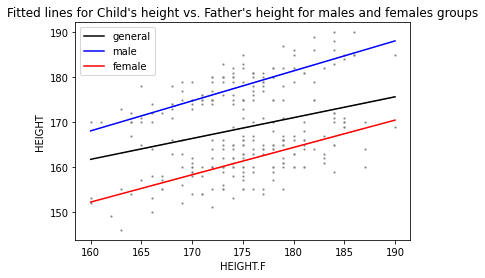

In [140]:
# Plot the fits of the lm models, you need three lines, one blue, one black, and one red.  
# points are in grey.  
sns.scatterplot(x = df["HEIGHT.F"], y=df["HEIGHT"], color = 'grey', s = 5.0).set(title="Fitted lines for Child's height vs. Father's height for males and females groups")

# add fitted lines
sns.lineplot(x = df["HEIGHT.F"], 
                y = df["y_hat"], 
                color = "black")
sns.lineplot(x = df_M["HEIGHT.F"], 
                y = df_M["y_hat"], 
                color = "blue")
sns.lineplot(x = df_F["HEIGHT.F"], 
                y = df_F["y_hat"], 
                color = "red")

plt.legend(labels=["general","male", "female"])
# don't forget to title it correctly! 

# Comment

---
# Part 2 Logistic and Weighted Linear Regression 
---

Fit a logistic regression model predicting gender as `GENDER ~ WEIGHT`, name it `lm_logreg`. 

Render a scatter plot with the `x=HEIGHT.F`, `y=HEIGHT` with the points colored by the predicted gender of the `lm_logreg` model. 
- Females in red. 
- Males in blue. 

Using the visual, comment on the performance of the logistic regression to segment populations. Use one of subplots for the pairplot in Part 1 to justify the performance of the model. 

In [141]:
# do a logistic model predicting GENDER 
# load data
df_2 = pd.read_csv("/content/drive/MyDrive/STA2453/italian_students.csv")

In [142]:
df_2

,Unnamed: 0,GENDER,HEIGHT,WEIGHT,HEIGHT.F
0,1,M,184,82,185
1,2,M,186,83,180
2,3,M,186,88,182
3,4,M,179,74,177
4,5,M,175,68,175
...,...,...,...,...,...
265,266,F,160,57,178
266,267,F,160,48,172
267,268,F,165,87,174
268,269,F,165,63,184


In [143]:
# Convert GENDER from "M" to 1 and "F" to 0
# df_2['GENDER'].replace(['M', 'F'], [1, 0], inplace=True)

X_log = df_2[["WEIGHT"]]
y_log = df_2["GENDER"]

lm_logreg = LogisticRegression()
lm_logreg.fit(X_log, y_log)
# predict class. 
df_2['predicted_gender'] = lm_logreg.predict(X_log)

[Text(0.5, 1.0, "Child's Height vs. Father's Height labeled by predicted gender")]

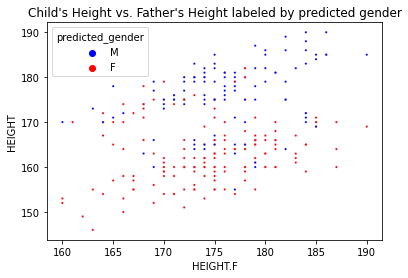

In [144]:
# plot scatter plot with logistic regression labels by color. 
sns.scatterplot(x = df_2["HEIGHT.F"], y=df_2["HEIGHT"], hue = df_2["predicted_gender"], palette=["blue", "red"], s = 5.0).set(title="Child's Height vs. Father's Height labeled by predicted gender")
# comment on the results. 

## Comment
Compared to the scatter plot of Child's height vs. Father's height color-labeled by gender in part one, this plot shows there are some wrongly predicted labels, which means the performance of this logistic model is not very good.

Acquire the probabilities from the logistic regression model, denote the probability matrix `Z`. The matrix should be `(270,2)` in shape, each entry denoting the probability for each observation `i` belonging to group `g`. ie. `z_ig`. 

For each column, create two weighted linear regression models denoted as `lm_female_weighted` and `lm_male_weighted`.

In [145]:
# calculate the weights of a logistic model, then use them for a weighted regression. 
Z = lm_logreg.predict_proba(X_log)
weights_1 = Z[:, 0]
weights_2 = Z[:, 1]
# declare the weighted models. 
# Fit a weighted linear regression model.
lm_female_weighted = LinearRegression() 
lm_male_weighted = LinearRegression() 
# fit the models. 
# numpy matrices.
X = df_2[['HEIGHT.F']]
y= df_2['HEIGHT'] 
lm_female_weighted.fit(X, y, sample_weight = weights_1)
lm_male_weighted.fit(X, y, sample_weight = weights_2)

LinearRegression()

Plot the data points in grey, plot the predicted fits of the general population for each linear model. 

- `lm_male_weighted` prediction in blue (blue line)
- `lm_female_weighted` prediction in red (red line)

Title it appropriately and comment on the weighted model fits compared to the `lm_general` model. 

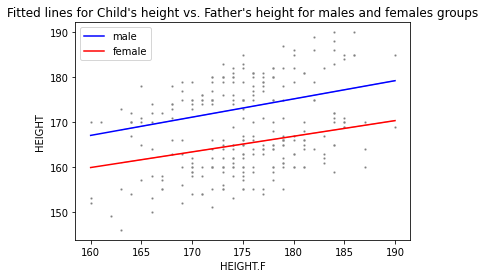

In [146]:
# Plot the fits of the lm models. 
def plot_fitted_line(df, y_hat, color): 
  """
  Helper function for plotting predicted line.
  """
  df_copy = df.copy()
  df_copy["y_hat"] = y_hat 
  sns.lineplot(x = df_2["HEIGHT.F"], 
              y = df_copy["y_hat"], 
              color = color)
  
# Plot the original data.
sns.scatterplot(x = df_2["HEIGHT.F"], y=df_2["HEIGHT"], color = 'grey', s = 5.0).set(title="Fitted lines for Child's height vs. Father's height for males and females groups")

# Prediction.
lm_female_weighted_y_hat = lm_female_weighted.predict(X)
lm_male_weighted_y_hat = lm_male_weighted.predict(X)

# Plot the fitted lines.
plot_fitted_line(df_2, lm_male_weighted_y_hat, "blue")
plot_fitted_line(df_2, lm_female_weighted_y_hat, "red")


plt.legend(labels=["male", "female"])
# comment on the results of the weighted linear regression. 

---
## Part 3: Finite Mixture Modelling 
---

Fit an appropriate finite mixture model to the dataset. Determine the optimal number of components `G` using BIC.

To achieve a 4 you must appropriately model both the conditional distribution of `HEIGHT ~ HEIGHT.F` and the covariate distribution for `HEIGHT.F` within the context of a finite mixture model. 

In [147]:
class FiniteLinearModel(nn.Module):
  """
  Class for Finite mixtures of Linear models.
  """

  def __init__(self, G: int, data: torch.Tensor, seed: int):
    """
    Constructor class for finite mixtures of linear models.
    G: total number of groups.
    """

    if not isinstance(data, torch.Tensor):
        raise Exception("data is not of torch.Tensor type")

    super(FiniteLinearModel, self).__init__()

    # define constants.
    self.n = data.shape[0]  # number of observations
    self.G = G if G > 0 else exec("raise Exception('G has to be valid')")  # number of groups

    # define data
    self.X = data[:, 1:]  # self.X = df['dens']
    # add ones column
    self.X = torch.concat((self.X, torch.ones(self.n, 1)), axis=1)
    self.y = data[:, 0]  # self.y = df['y_log']

    # first column is y, the rest are covariates.
    self.p = self.X.shape[1]  # self.p=2, 'dens' and ones

    # Set random seed for all torch use.
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

    # Randomly initialize parameters.
    self.pi = torch.rand(self.G, 1)  # define mixing proportion pi_g for each group 
    self.z = torch.rand(self.n, self.G)  # define membership weight z_ig for each observation
    self.beta = torch.rand(self.G, self.p)  # estimated coefficients for weighted linear regression; dens -> y_log
    # each group follows a different Gaussian distribution
    # -> different mu's and sigma's for each group
    self.mu = torch.rand(self.G, 1)
    self.sigma = torch.rand(self.G, 1).abs()

    self.leading_constants = - 0.5 * torch.Tensor([2.0 * torch.pi]).log()  # log(sqrt(2pi))

  def log_density(self) -> torch.Tensor:
    """
    Take in a covariate dataset X, and sample y.
    Use X to estimate mu; mu_g = y_hat predicted by the fitted weighted linear regression.
    Compute an (n x G) matrix of log Gaussian densities.
    """

    # Calculate log density matrix n x G.
    log_dens = torch.zeros(self.n, self.G)

    # Loop through the groups.
    for g in range(self.G):

        # Estimate mu by the fitted weighted linear regression.
        estimated_mu = (self.beta[g] * self.X).sum(-1)

        # Compute exponential terms.
        exp_terms = - 0.5 * ((self.y - estimated_mu) / self.sigma[g]).pow(2)
        
        # Add each log component.
        log_dens[:, g] = exp_terms + self.leading_constants
        log_dens[:, g] += - self.sigma[g].log()

    return log_dens

  def Estep(self):
    """
    Computes the expectation step using parameters for X ,y.
    """
    dens = self.log_density().exp()  # density matrix n x G

    numerator = dens * self.pi.T  # multiply by mixing proportion pi_g for each group

    denominator = numerator.sum(-1).unsqueeze(-1)
  
    # update the membership weight z_ig
    self.z = dens / denominator

  def Mstep(self):
    """
    Use the membership weights and the data to calculate new parameter values.
    """
    # the sum of the membership weights for the gth group
    n_g = self.z.sum(dim = 0)

    # mixing proportion pi_g for each group
    self.pi = n_g / self.n

    # Fit a weighted linear regression model for each group g to eatimate u_g and sigma_g.
    for g in range(self.G):
      z_g = self.z[:, g]
      weighted_lm = LinearRegression()
      weighted_lm.fit(self.X, self.y, sample_weight = z_g)
      # update coefficients
      self.beta[g, :] = torch.Tensor(weighted_lm.coef_) 
      # use the fitted weighted linear regression to estimate u_g
      predicted_mu = weighted_lm.predict(self.X)
      # update u_g
      self.mu[g] = torch.sum(torch.Tensor(predicted_mu)) / n_g[g]
      # update sigma_g
      self.sigma[g] = torch.sqrt(torch.sum(z_g * (self.y - self.mu[g])**2) / n_g[g])
  
  def objective_fn(self):      
    # Compute the density matrix n x G. 
    dens = self.log_density().exp()

    obj_func = -((dens * self.z).sum(-1).log()).sum() 
    
    return obj_func
  
  def BIC(self):
    """
    Calculate the Bayesian Information Criterion for model performance comparisons.
    """
    # Calculate the number of parameters. 
    rho = self.mu.numel() + self.sigma.numel() + self.z.numel()
    # Calculate BIC.
    bic = self.objective_fn() * (-2.0) - rho * m.log(self.y.shape[0])

    return float(bic.detach()) 
  
  def train(self, max_iterations):
    """
    Run the EM algorithm to predict the labels for each observation.
    """
    for i in range(max_iterations + 1):
      self.Estep()
      self.Mstep()
      
      # Label each observation by the greatest weight.
      predict_label = torch.argmax(self.z, dim=1) + 1  
      # Transform labels into a numpy.array.
      predict_label = predict_label.detach().numpy().astype(int)

      # Check membership sizes and BIC for every 100 iterations.
      if i % 100 == 0:
        print(f"Membership sizes for the {i+1}th iteration:")
        print(pd.Series(predict_label).value_counts())  
        print(f"BIC for the {i+1}th iteration: {self.BIC()}") 
        print("\n")
        
    return predict_label 

### Plot Mixture Model Results 

Acquire the labels of the model by taking the maximum of the a-posteriori. (MAP) Render a scatter plot of 
`x=HEIGHT.F`, `y=HEIGHT`, with the colors being the labels given by the MAP's. 

- Males should be colored in blue.
- Females should be colored in red. 

comment on the ability of the finite mixture model to segment the population in an unsupervised manner. 

Membership sizes for the 1th iteration:
2    203
1     67
dtype: int64
BIC for the 1th iteration: -3243.578125


Membership sizes for the 101th iteration:
2    211
1     59
dtype: int64
BIC for the 101th iteration: -3586.5810546875


Membership sizes for the 201th iteration:
1    204
2     66
dtype: int64
BIC for the 201th iteration: -3292.670654296875


Membership sizes for the 301th iteration:
2    154
1    116
dtype: int64
BIC for the 301th iteration: -3323.509521484375


Membership sizes for the 401th iteration:
2    150
1    120
dtype: int64
BIC for the 401th iteration: -3447.101318359375


Membership sizes for the 501th iteration:
2    161
1    109
dtype: int64
BIC for the 501th iteration: -3484.293701171875


Membership sizes for the 601th iteration:
1    204
2     66
dtype: int64
BIC for the 601th iteration: -3475.692138671875


Membership sizes for the 701th iteration:
2    154
1    116
dtype: int64
BIC for the 701th iteration: -3476.493408203125


Membership sizes for the 801

[Text(0.5, 1.0, 'Plot the dataset colored by the assigned labels of the fitted mixture model')]

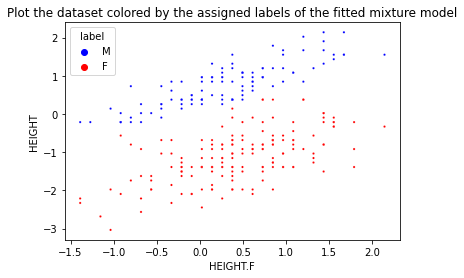

In [148]:
# Tranform the data set into a tensor.
data_df = df_2.copy()
data_s = data_df[['HEIGHT','HEIGHT.F']].to_numpy()
data_s = torch.Tensor(data_s)

# Normalize the data.
data_s = (data_s - data_s.mean())/data_s.std()  

# Define GMM model. 
G = 2
seed = 101  # Set random seed.
flm = FiniteLinearModel(G=G, data=data_s, seed = seed)

# Train the GMM model by EM alorithm.
num_iterations = 5000  # Set number of iterations.

# get MAP labels.
labels = flm.train(num_iterations)

# Transform data_s into a pd dataframe
data_s = pd.DataFrame(data_s.detach().numpy())
data_s['label'] = labels
data_s.columns = ['HEIGHT', 'HEIGHT.F', 'label']
data_s['label'].replace([1, 2], ['F', 'M'], inplace=True)

# declare colours and plot HEIGHT.F vs HEIGHT. 
# Plot the dataset colored by the assigned labels of the fitted mixture model.
sns.scatterplot(data=data_s, x='HEIGHT.F', y='HEIGHT', hue="label", palette = ['blue', 'red'], s = 5).set(title="Plot the dataset colored by the assigned labels of the fitted mixture model")

In [149]:
# Check the true labels for gender.
true_labels = df_2['GENDER'].value_counts()
print("True gender labels:")
print(true_labels)

True gender labels:
F    151
M    119
Name: GENDER, dtype: int64


## Comment
The finite mixture model segments the population well in to in an unsupervised manner

### Classification Table
Use the following function (`table_counts`) to create a classification table. 
Pass in the GENDER column as well as the output of the MAP labels, and comment on the ability of the Finite mixture model to correctly classify the sub-populations. 


In [150]:
def table_counts(x: np.array, y: np.array, labels=["x","y"]) -> None:
  """
    Creates a classification table to visually assess misclassification. 
  """

  table_df = pd.DataFrame({labels[0]: x, labels[1]: y})
  print(table_df.groupby(labels).size().unstack())

# get the classification table. 
gender = df_2["GENDER"].to_numpy()
MAP_labels = data_s['label'].to_numpy()
table_counts(gender, MAP_labels)
# comment on the performance of the finite mixture model. 

y      F      M
x              
F  151.0    NaN
M   12.0  107.0


## Comment
True Positive (TP) = 151

True Negative (TN) = 107

False Positive (FP) = 12

Accuracy = (TP+TN)/Total= (151+107)/270 = 95.56%

Precision = TP/(TP+FP) = 151/(151+12) = 92.64%

Thus, the performance of the finite mixture model is very good!
